# Polycystic Ovary Syndrome (PCOS) detection using Machine Learning

## Feature Selection

### Importing modules and libraries

In [ ]:
# importing pandas, matplotlib and seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load pre-processed dataset

In [ ]:
# mounting to google drive folder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the pre-processed PCOS dataset

pcos_clean_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PCOS/Datasets/PCOS_Clean_Dataset.csv")
pcos_clean_df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
PCOS (Y/N),0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age (yrs),28.000000,36.000000,33.000000,37.000000,25.000000,36.000000,34.000000,33.000000,32.000000,36.000000,20.000000,26.000000
Weight (Kg),44.600000,65.000000,68.800000,65.000000,52.000000,74.100000,64.000000,58.500000,40.000000,52.000000,71.000000,49.000000
Height(Cm),152.000000,161.500000,165.000000,148.000000,161.000000,165.000000,156.000000,159.000000,158.000000,150.000000,163.000000,160.000000
BMI,19.304017,24.921163,25.270891,29.674945,20.060954,27.217631,26.298488,23.139907,16.023073,23.111111,26.722873,19.140625
Blood Group,15.000000,15.000000,11.000000,13.000000,11.000000,15.000000,11.000000,13.000000,11.000000,15.000000,15.000000,13.000000
Pulse rate(bpm),78.000000,74.000000,72.000000,72.000000,72.000000,78.000000,72.000000,72.000000,72.000000,80.000000,80.000000,72.000000
RR (breaths/min),22.000000,20.000000,18.000000,20.000000,18.000000,28.000000,18.000000,20.000000,18.000000,20.000000,20.000000,20.000000
Hb(g/dl),10.480000,11.700000,11.800000,12.000000,10.000000,11.200000,10.900000,11.000000,11.800000,10.000000,10.000000,9.500000
Cycle(R/I),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


### Data

In [ ]:
# describe the data frame

pcos_clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),538.0,0.327138,0.469605,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),538.0,31.420074,5.413801,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),538.0,59.644052,11.051033,31.000000,52.000000,59.300000,65.000000,108.000000
Height(Cm),538.0,156.480104,6.042238,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,538.0,24.323562,4.059873,12.417882,21.739333,24.236563,26.659729,38.900714
Blood Group,538.0,13.802974,1.844573,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),538.0,73.250929,4.441870,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),538.0,19.236059,1.688509,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),538.0,11.160558,0.868516,8.500000,10.500000,11.000000,11.775000,14.800000
Cycle(R/I),538.0,0.276952,0.447909,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# compute pairwise correlation of columns

pcos_clean_df.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.171349,0.209969,0.065465,0.199317,0.033701,0.092699,0.038641,0.087809,0.400668,...,0.290335,0.380985,0.071979,-0.013765,0.019870,0.601208,0.650929,1.299969e-01,0.094528,0.107639
Age (yrs),-0.171349,1.000000,-0.030984,-0.119885,0.017561,-0.011836,0.045634,0.088748,-0.023686,-0.082625,...,-0.034990,-0.034234,-0.025916,0.131715,0.071518,-0.113809,-0.158386,-2.096918e-02,-0.082677,-0.100115
Weight (Kg),0.209969,-0.030984,1.000000,0.419808,0.902321,0.071354,0.020101,0.045339,0.009363,0.200159,...,0.064817,0.162872,-0.065109,0.066935,0.120260,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452
Height(Cm),0.065465,-0.119885,0.419808,1.000000,-0.006264,0.039409,-0.073608,-0.030492,0.025962,-0.024809,...,0.064912,0.032853,0.015610,-0.009814,0.017915,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273
BMI,0.199317,0.017561,0.902321,-0.006264,1.000000,0.059444,0.050479,0.064575,0.002309,0.236147,...,0.044710,0.161228,-0.076368,0.085104,0.122491,0.143641,0.105599,-1.228819e-02,-0.113855,0.012362
Blood Group,0.033701,-0.011836,0.071354,0.039409,0.059444,1.000000,0.047865,-0.022707,-0.001652,0.124770,...,0.040382,-0.034770,0.067994,0.024252,0.079432,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257
Pulse rate(bpm),0.092699,0.045634,0.020101,-0.073608,0.050479,0.047865,1.000000,0.305676,-0.052796,0.104467,...,-0.004395,0.059712,-0.039055,-0.017868,0.007471,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456
RR (breaths/min),0.038641,0.088748,0.045339,-0.030492,0.064575,-0.022707,0.305676,1.000000,-0.038693,0.014348,...,0.032356,0.137533,-0.054183,0.032820,0.046963,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551
Hb(g/dl),0.087809,-0.023686,0.009363,0.025962,0.002309,-0.001652,-0.052796,-0.038693,1.000000,0.041967,...,0.051089,0.077310,0.011980,0.119273,0.001855,0.062314,0.073459,3.087933e-02,0.023528,-0.063592
Cycle(R/I),0.400668,-0.082625,0.200159,-0.024809,0.236147,0.124770,0.104467,0.014348,0.041967,1.000000,...,0.131983,0.207862,-0.005383,0.042068,0.083673,0.294142,0.252943,3.396002e-02,0.013791,0.039000


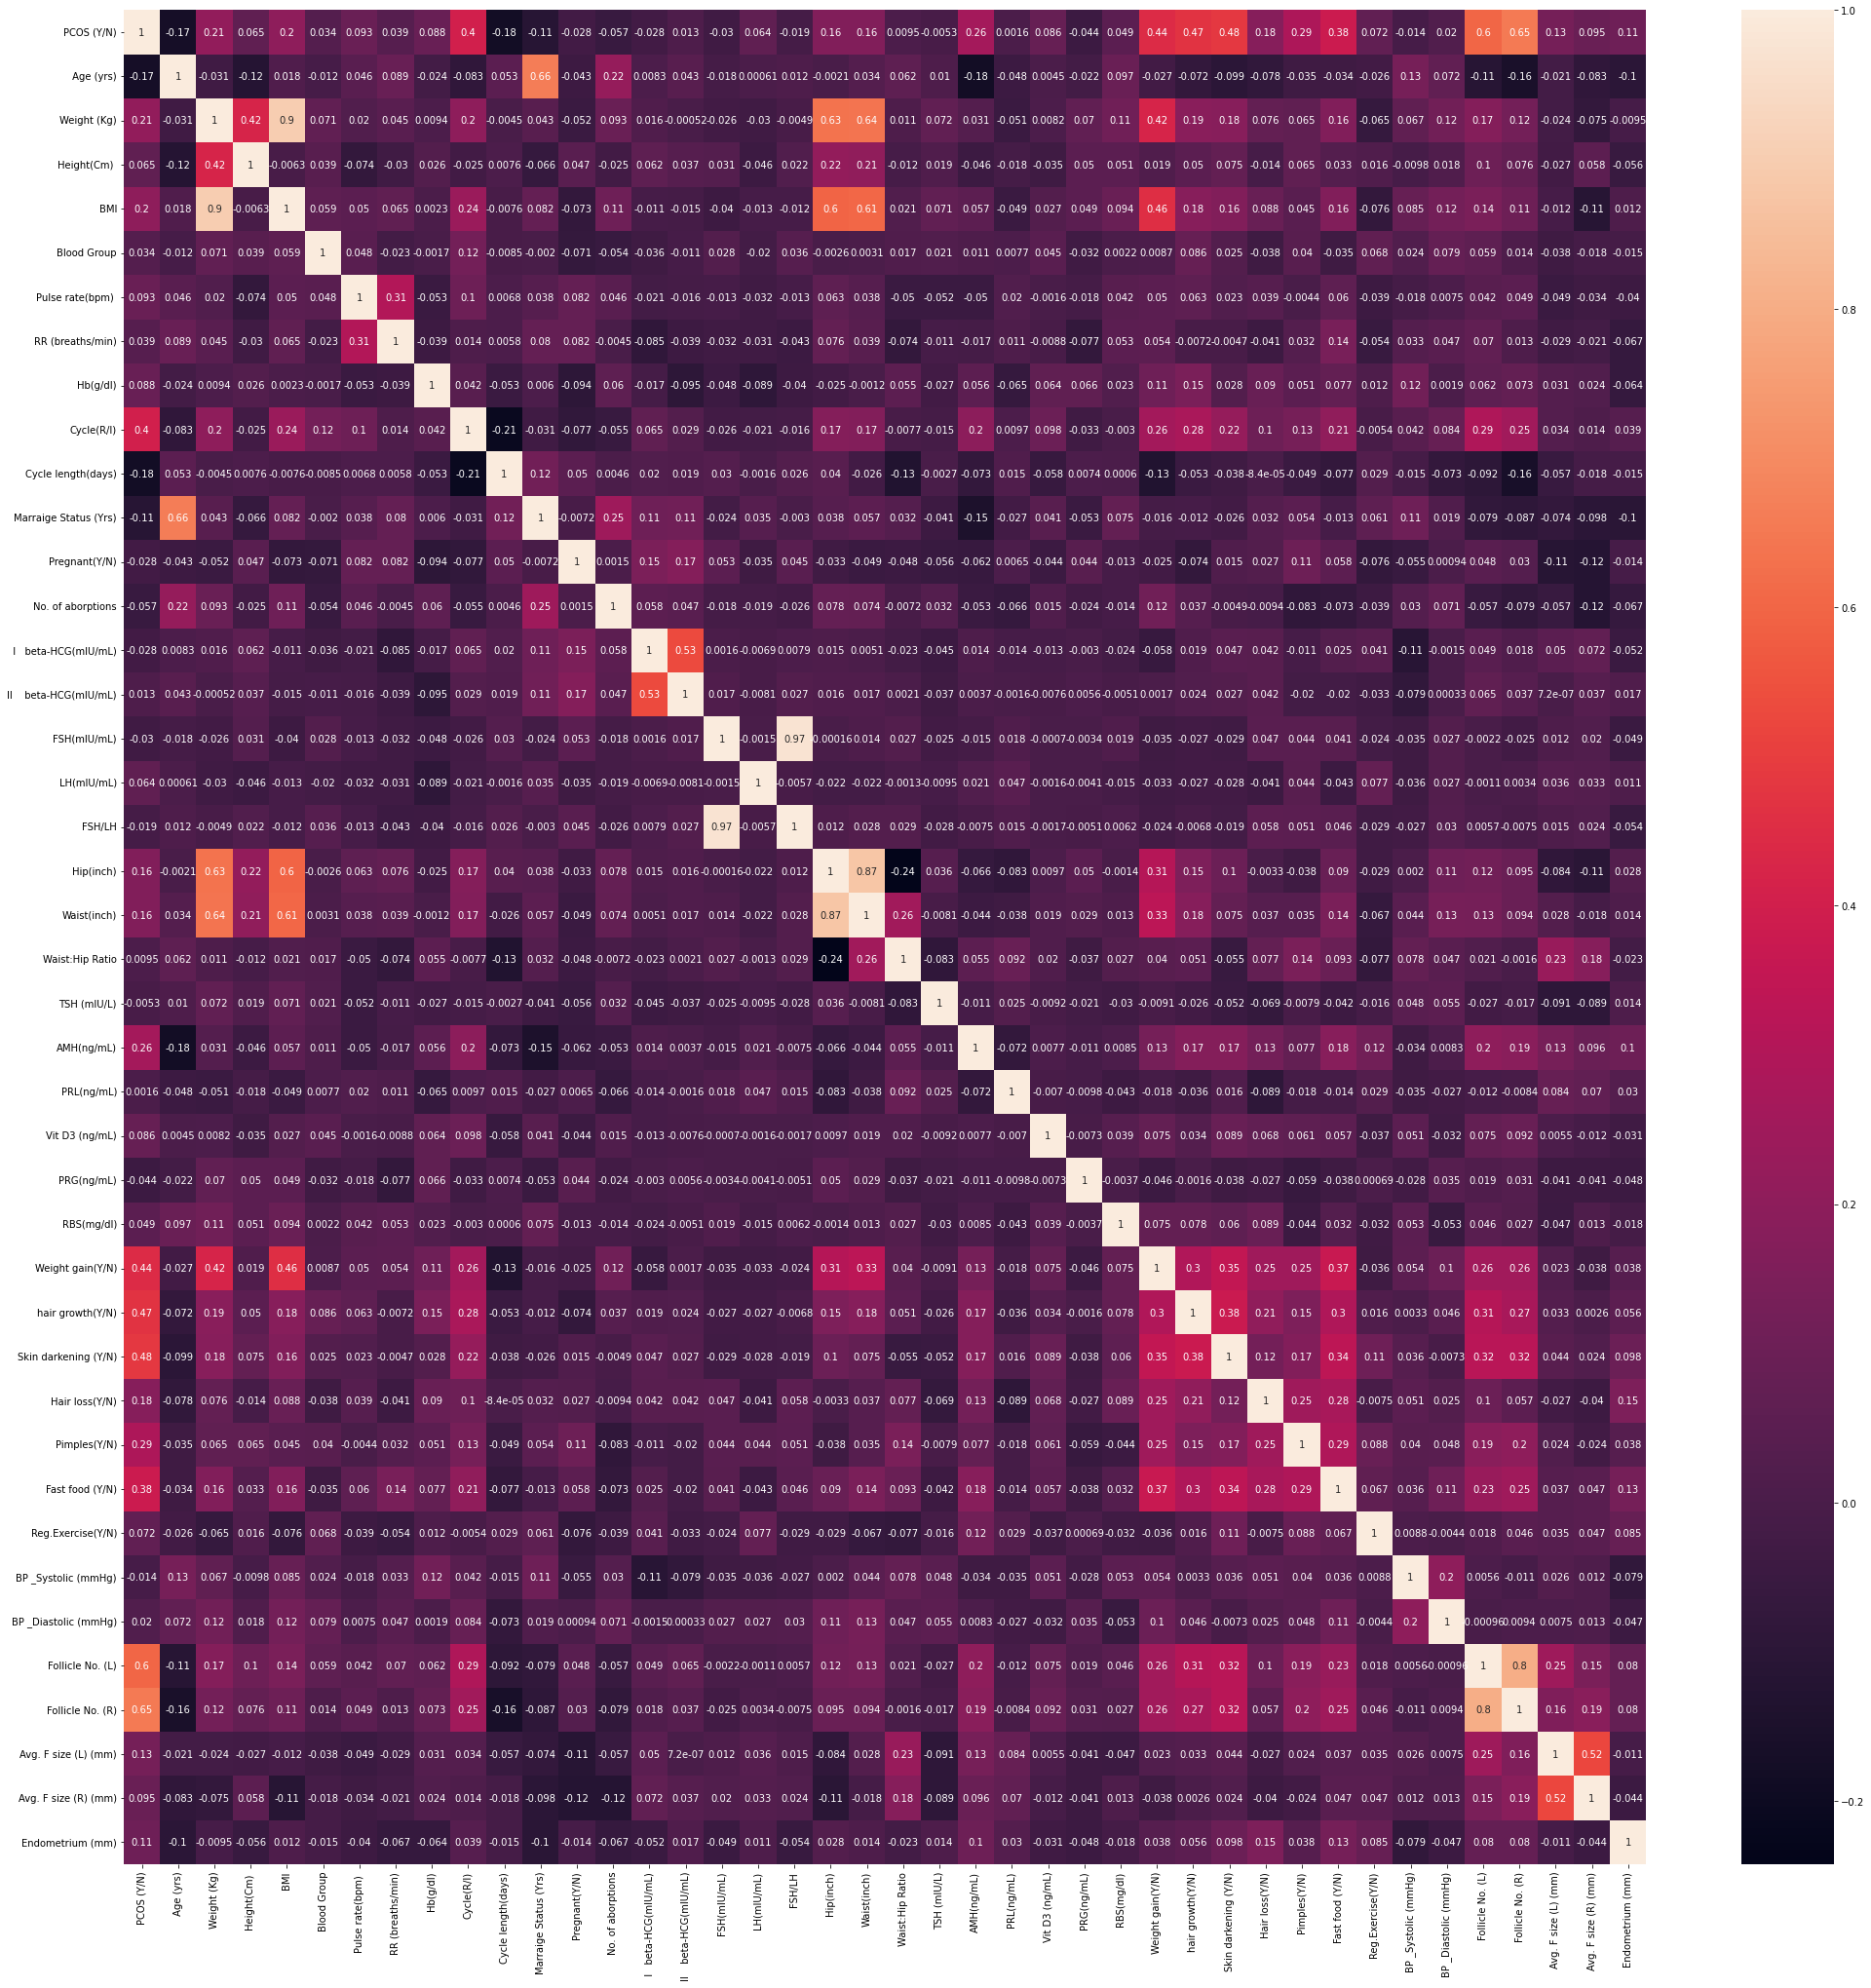

In [ ]:
plt.figure(figsize=(35, 35))
sns.heatmap(pcos_clean_df.corr(), annot=True)
plt.show()

In [ ]:
# display a heatmap of the correlation matrix of 'pcos_clean_df' dataFrame

corr_features = pcos_clean_df.corrwith(pcos_clean_df["PCOS (Y/N)"], method='pearson').abs().sort_values(ascending=True)
corr_features = corr_features[corr_features > 0.4].index
corr_features

Index(['Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'PCOS (Y/N)'],
      dtype='object')

In [ ]:
# create a correlation dataframe using the corr_features

corr_df = pcos_clean_df[corr_features]
corr_df.head()

,Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Follicle No. (L),Follicle No. (R),PCOS (Y/N)
0,0,0,0,0,3,3,0
1,0,0,0,0,3,5,0
2,0,0,0,0,13,15,1
3,0,0,0,0,2,2,0
4,0,0,0,0,3,4,0


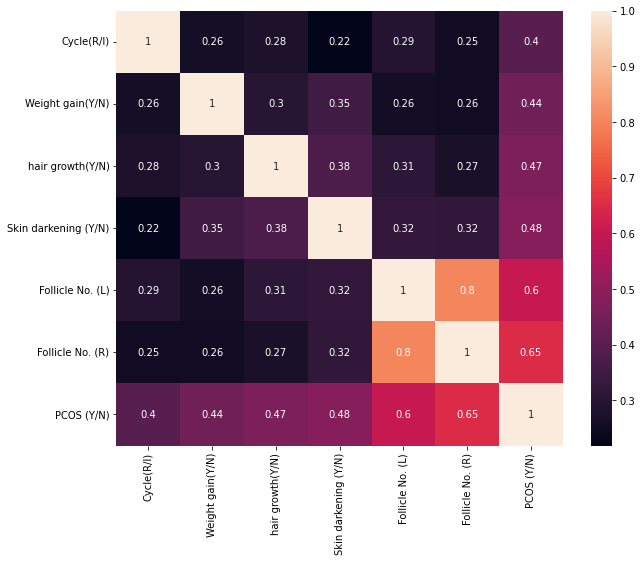

In [ ]:
# display a heatmap of the correlation matrix of 'corr_df' dataFrame

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True)
plt.show()

## Saving datasets with selected features

In [ ]:
corr_df.to_csv('/content/drive/My Drive/Colab Notebooks/PCOS/Datasets/PCOS_Selected_Features.csv', index=False)